This is a template to creat, apply and validate a machine learning model for land use classificatin. The model is trained and valided with seperate shapefiles. The output include:

1. a statistic summary of the input training data for the model (export as .csv file).
2. a trained machine learning model. In this example a random forest model is used (export as a .pkl file). 
3. a classified image using the trained model (export as .tif). 
4. validating the classified image, generating an accuracy matrix and export as .csv file. 
 

In [2]:
import os,sys
sys.path.append(r"../templates/")
import PYEO_model
sys.path.append(r"/opt/pyeo")
import pyeo.core as pyeo
import numpy as np
import csv

/opt/tljh/user/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Tenacity, Planet and Multiprocessing are required for Planet data downloading


In [11]:
#set input parameters 
os.chdir('/home/jupyter-yaqing/')

training_tif = "Data/Brazil/2018.tif"
training_shp = "Data/Brazil/shp/training/training.shp"
training_filedname = 'Id'

tobe_classified_tif = training_tif

validation_shp = "Data/Brazil/shp/validation/validation.shp"
validation_filedname = 'Id'

nodata = 0

In [12]:
#set output folder
out_dir = "Output/template3_model_building/"
out_model = os.path.join(out_dir,'model.pkl')
out_training_summary = os.path.join(out_dir, 'training_summary.csv')
out_classified = os.path.join(out_dir, "2018_classified.tif")

In [13]:
#Set flag as False to build and save model; Otherwise, will run an exisiting model 
does_model_exist = False

In [14]:
# Build model 
if not does_model_exist:
    features, classes = pyeo.get_training_data(training_tif, training_shp, attribute=training_filedname)
    
    model, scores = PYEO_model.train_model_rf(features,classes)
    PYEO_model.save_model(model, out_model) 
    
else:
    model = load_model(out_model)

In [15]:
# Explore training dataset by export the siganiture of each training pixel and summarise the statistics of each categoriy  
sigs = np.vstack((classes, features.T))
out_sig= os.path.join(out_dir, 'sig.csv')
with open(out_sig , 'w', newline='') as outsig:
    writer = csv.writer(outsig)
    writer.writerows(sigs.T)
# generate statistic summary for each class:
PYEO_model.summarise_training(in_classes= classes,out_csv= out_training_summary, sumarise_type = 'count')

/home/jupyter-yaqing/Templates/PYEO_model.py:219: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  training_summary.to_csv(out_csv)


In [17]:
#classify image
pyeo.classify_image(image_path= tobe_classified_tif, model_path=out_model, class_out_path= out_classified,num_chunks =10)#need to chagne num_chunks


'Output/template3_model_building/2018_classified.tif'

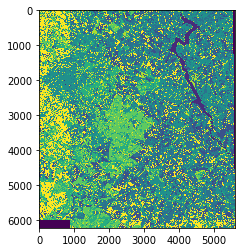

In [18]:
PYEO_model.show_satellite_image(out_classified)

In [9]:
#validate the map and generate accuracy matrix 
PYEO_model.validate_classes(inRaster=out_classified, shpdir= validation_shp , field_name=validation_filedname, 
                            out_fldr=out_dir,nodata = nodata)

~validating ... Data/Brazil/shp/validation/validation.shp
The clipped shapefile to the extent of the raster, resultant shp is saved in Output/template3_model_building/outline_clip.shp
rasterise the shapefile
['0.0', '1.0', 936746, 0.026912]
['0.0', '2.0', 4997538, 0.143577]
['0.0', '3.0', 5596626, 0.160789]
['0.0', '4.0', 9815910, 0.282008]
['0.0', '5.0', 4106826, 0.117988]
['0.0', '6.0', 2555539, 0.07342]
['0.0', '7.0', 2392174, 0.068726]
['0.0', '8.0', 4405893, 0.12658]
['1.0', '1.0', 3068, 0.984596]
['1.0', '4.0', 32, 0.01027]
['1.0', '5.0', 14, 0.004493]
['1.0', '6.0', 2, 0.000642]
['2.0', '2.0', 582, 0.726592]
['2.0', '3.0', 3, 0.003745]
['2.0', '4.0', 20, 0.024969]
['2.0', '7.0', 15, 0.018727]
['2.0', '8.0', 181, 0.225968]
['4.0', '1.0', 4, 0.001432]
['4.0', '2.0', 8, 0.002864]
['4.0', '3.0', 153, 0.05478]
['4.0', '4.0', 2545, 0.911207]
['4.0', '7.0', 16, 0.005729]
['4.0', '8.0', 67, 0.023989]
